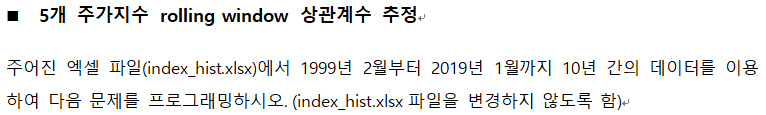

#####  	5개 주가지수 rolling window 상관계수 추정
    주어진 엑셀 파일(index_hist.xlsx)에서 1999년 2월부터 2019년 1월까지 10년 간의 데이터를 이용하여 다음 문제를 프로그래밍하시오. (index_hist.xlsx 파일을 변경하지 않도록 함)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('dark')
%matplotlib inline

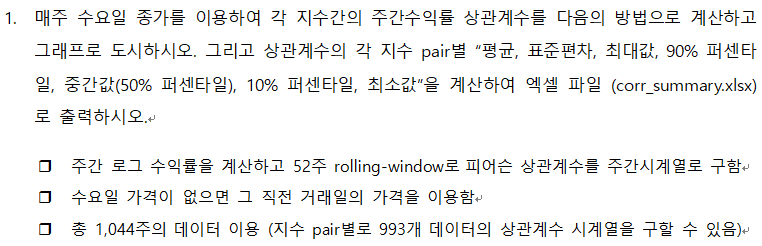

##### 1.	매주 수요일 종가를 이용하여 각 지수간의 주간수익률 상관계수를 다음의 방법으로 계산하고 그래프로 도시하시오. 그리고 상관계수의 각 지수 pair별 "평균, 표준편차, 최대값, 90% 퍼센타일, 중간값(50% 퍼센타일), 10% 퍼센타일, 최소값"을 계산하여 엑셀 파일 (corr_summary.xlsx) 로 출력하시오.
 	주간 로그 수익률을 계산하고 52주 rolling-window로 피어슨 상관계수를 주간시계열로 구함
 	수요일 가격이 없으면 그 직전 거래일의 가격을 이용함
 	총 1,044주의 데이터 이용 (지수 pair별로 993개 데이터의 상관계수 시계열을 구할 수 있음)


In [2]:
index = pd.read_excel('./index_hist.xlsx')
index2 = index.set_index('date')

index_wed = index2.resample('w-wed').last()
index_ret = index_wed.apply(np.log).diff()
index_ret2 = index_ret.loc['1999-02' : '2019-01']

index_corr = index_ret2.rolling(52).corr().dropna()
index_corr2 = index_corr.swaplevel(0,1)

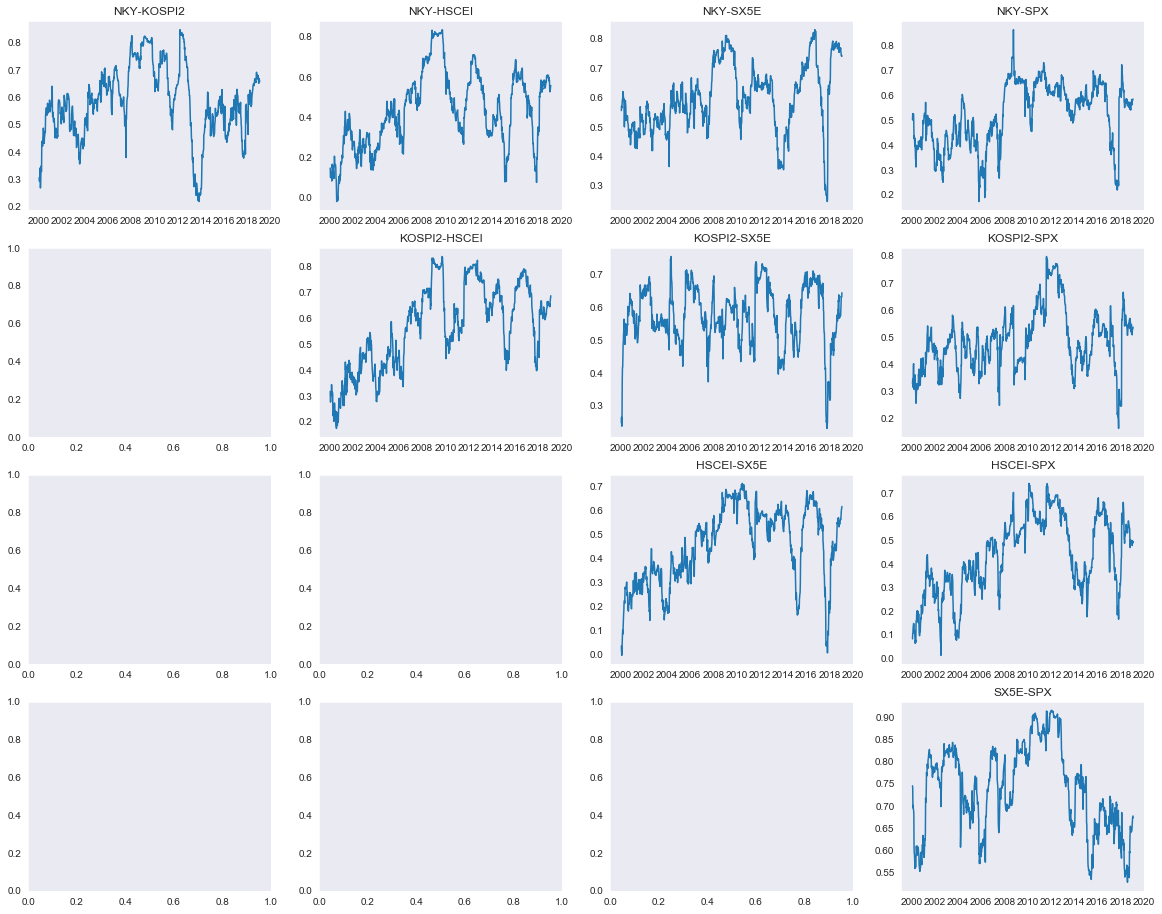

In [3]:
# 1번 답 : 그래프 출력

index_list_1 = ['NKY','KOSPI2','HSCEI','SX5E']
index_list_2 = ['KOSPI2','HSCEI','SX5E','SPX']

sns.set_style('dark')

fig, axes = plt.subplots(4, 4, figsize = (20,16))

for i, index_1 in zip(range(4), index_list_1) : 
    for j, index_2 in zip(range(4), index_list_2) :
        if i <= j :
            axes[i,j].plot(index_corr2[index_1][index_2])
            axes[i,j].set_title(index_1 + '-' + index_2)

In [4]:
stat_list = ['mean', 'std', 'max', '90%', '50%', '10%', 'min']

stat_df = pd.DataFrame(stat_list)
corr_summary = stat_df.set_index(0)
corr_summary.index.name = ''

index_list_3 = ['HSCEI','KOSPI2','NKY','SX5E', 'SPX']
index_list_4 = ['HSCEI','KOSPI2','NKY','SX5E', 'SPX']

for i, index_1 in zip(range(5), index_list_3) : 
    for j, index_2 in zip(range(5), index_list_4) :
        if i < j :
            a_mean = index_corr2[index_1][index_2].mean()
            a_std = index_corr2[index_1][index_2].std()
            a_max = index_corr2[index_1][index_2].max()
            a_90 = index_corr2[index_1][index_2].quantile(0.9)
            a_50 = index_corr2[index_1][index_2].quantile(0.5)
            a_10 = index_corr2[index_1][index_2].quantile(0.1)
            a_min = index_corr2[index_1][index_2].min()
            
            col = index_1 + '-' + index_2
            corr_summary[col] = [a_mean, a_std, a_max, a_90, a_50, a_10, a_min]
            
mean_list = corr_summary.mean(axis=1).tolist()
corr_summary['Mean'] = mean_list

In [5]:
#1번 답 : 각 지수 pair별 다양한 데이터 계산
corr_summary

,HSCEI-KOSPI2,HSCEI-NKY,HSCEI-SX5E,HSCEI-SPX,KOSPI2-NKY,KOSPI2-SX5E,KOSPI2-SPX,NKY-SX5E,NKY-SPX,SX5E-SPX,Mean
,,,,,,,,,,,
mean,0.566684,0.432617,0.452396,0.435130,0.582954,0.574500,0.485490,0.598576,0.521460,0.738601,0.538841
std,0.162470,0.185474,0.158151,0.162695,0.130879,0.089154,0.112829,0.114539,0.123728,0.097858,0.133778
max,0.839120,0.834726,0.711917,0.740728,0.848174,0.754905,0.797092,0.830930,0.864214,0.915161,0.813696
90%,0.780972,0.680123,0.652349,0.643502,0.760720,0.683832,0.638247,0.762570,0.663955,0.867797,0.713407
50%,0.589852,0.427676,0.477572,0.441348,0.580081,0.574785,0.480626,0.592086,0.548749,0.745442,0.545822
10%,0.341527,0.185631,0.228450,0.205673,0.430911,0.466668,0.353882,0.468908,0.347411,0.599630,0.362869
min,0.173997,-0.019078,-0.003704,0.012894,0.218102,0.231195,0.164329,0.246023,0.173000,0.528483,0.172524


In [6]:
# 1번 답: corr_summary 엑셀 파일로 출력
corr_summary.to_excel('./corr_summary.xlsx')

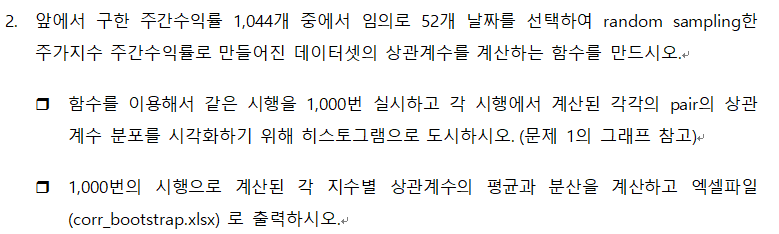

##### 2.	앞에서 구한 주간수익률 1,044개 중에서 임의로 52개 날짜를 선택하여 random sampling한 주가지수 주간수익률로 만들어진 데이터셋의 상관계수를 계산하는 함수를 만드시오.
    - 함수를 이용해서 같은 시행을 1,000번 실시하고 각 시행에서 계산된 각각의 pair의 상관계수 분포를 시각화하기 위해 히스토그램으로 도시하시오. (문제 1의 그래프 참고)
    - 1,000번의 시행으로 계산된 각 지수별 상관계수의 평균과 분산을 계산하고 엑셀파일 (corr_bootstrap.xlsx) 로 출력하시오.


In [7]:
index_ret_52 = index_ret2.copy()

In [8]:
# 2번 답 : 1,044개 중 52개 날짜 임의 선택 후 random sampling하는 함수
def sampling_52_corr(df) : 
    sample_52_date = df.index.tolist()
    sample_52_df = df.loc[np.random.choice(sample_52_date, 52)].corr()
    return sample_52_df

In [9]:
sampling_52_corr(index_ret_52)

,KOSPI2,HSCEI,NKY,SX5E,SPX
KOSPI2,1.000000,0.654680,0.576552,0.545704,0.439109
HSCEI,0.654680,1.000000,0.402563,0.241076,0.395173
NKY,0.576552,0.402563,1.000000,0.390528,0.207376
SX5E,0.545704,0.241076,0.390528,1.000000,0.698155
SPX,0.439109,0.395173,0.207376,0.698155,1.000000


In [10]:
total_corr = sampling_52_corr(index_ret_52).unstack().index
total_corr2 = pd.DataFrame(index = total_corr)

for i in range(1000) :
    sample_act = sampling_52_corr(index_ret_52).unstack()
    total_corr2 = pd.concat([total_corr2, sample_act],axis = 1)

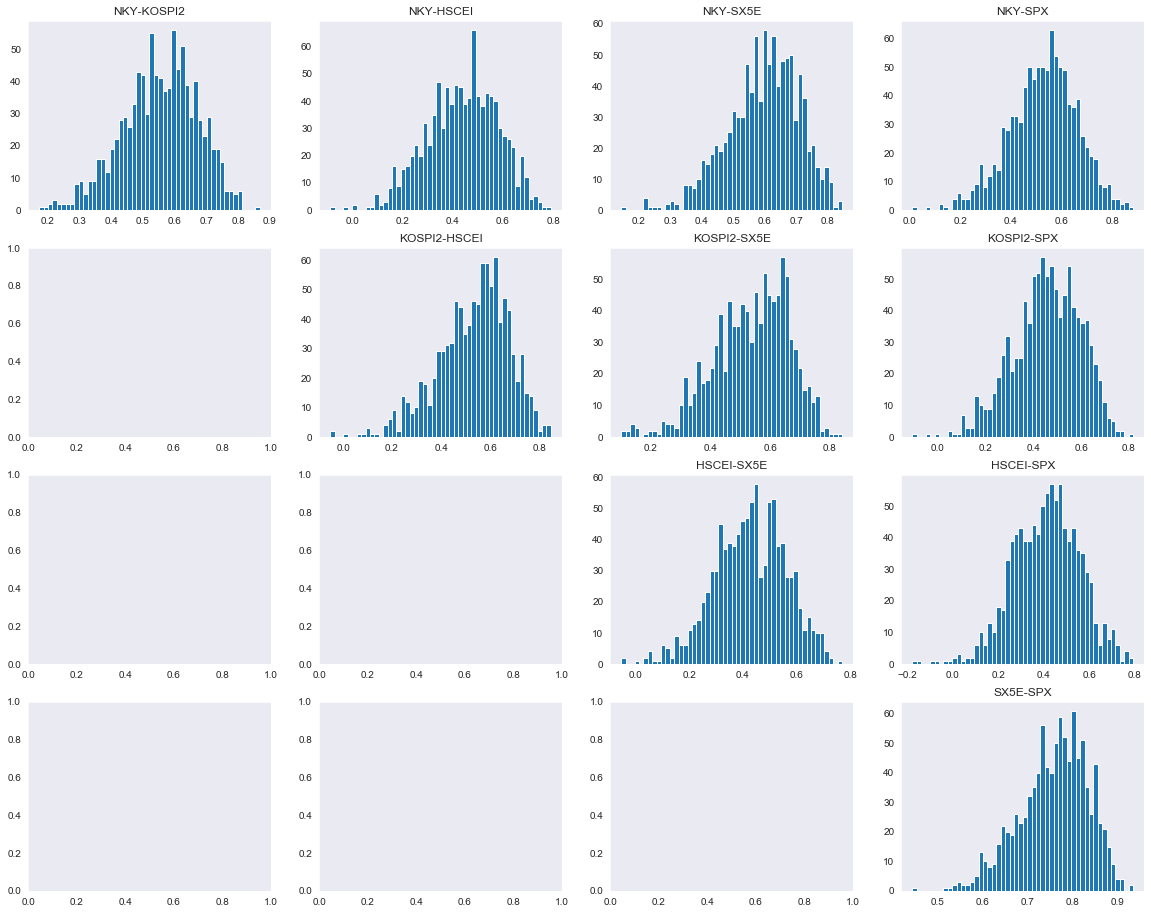

In [11]:
#2번 답 : 각 pair별 상관관계 히스토그램으로 그리기
sns.set_style('dark')

index_list_1 = ['NKY','KOSPI2','HSCEI','SX5E']
index_list_2 = ['KOSPI2','HSCEI','SX5E','SPX']


fig, axes = plt.subplots(4, 4, figsize = (20,16))

for i, index_1 in zip(range(4), index_list_1) : 
    for j, index_2 in zip(range(4), index_list_2) :
        if i <= j :
            axes[i,j].hist(total_corr2.loc[(index_1,index_2)], bins=50)
            axes[i,j].set_title(index_1 + '-' + index_2)

In [12]:
stat__list = ['mean', 'std']

stat__df = pd.DataFrame(stat__list)
corr_bootstrap = stat__df.set_index(0)
corr_bootstrap.index.name = ''

index_list_3 = ['HSCEI','KOSPI2','NKY','SX5E', 'SPX']
index_list_4 = ['HSCEI','KOSPI2','NKY','SX5E', 'SPX']

for i, index_1 in zip(range(5), index_list_3) : 
    for j, index_2 in zip(range(5), index_list_4) :
        if i < j :
            a_mean = total_corr2.loc[(index_1,index_2)].mean()
            a_std = total_corr2.loc[(index_1,index_2)].std()

            col_ = index_1 + '-' + index_2
            corr_bootstrap[col_] = [a_mean, a_std]

mean__list = corr_bootstrap.mean(axis=1).tolist()
corr_bootstrap['Mean'] = mean__list

In [13]:
#2번 답 : 각 지수별 상관계수의 평균과 표준편차 계산
corr_bootstrap

,HSCEI-KOSPI2,HSCEI-NKY,HSCEI-SX5E,HSCEI-SPX,KOSPI2-NKY,KOSPI2-SX5E,KOSPI2-SPX,NKY-SX5E,NKY-SPX,SX5E-SPX,Mean
,,,,,,,,,,,
mean,0.531561,0.436945,0.424943,0.410125,0.553046,0.535437,0.455849,0.595077,0.524833,0.757679,0.522549
std,0.144274,0.141517,0.133523,0.146131,0.118351,0.127145,0.139967,0.112272,0.132995,0.075252,0.127143


In [14]:
#2번 답 : corr_bootstrap 엑셀로 출력
corr_bootstrap.to_excel('./corr_bootstrap.xlsx')